link -> https://realpython.com/python-for-data-analysis/

# Set Your Objectives

The crucial part of data analysis happens before you start coding. You need to have a clearly defined scope. Without an understanding of where you want to go, you’re unlikely to ever get there.

In this case:

*   Is there any relationship between the Rotten Tomatoes ratings and those from IMDb?
*   Are there any insights to be gleaned from analyzing the lengths of the movies?
*   Is there a relationship between the number of enemies James Bond has killed and the user ratings of the movie in which they were killed?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ivane\Desktop\Python-for-Data-Analysis\jamesbond.csv').convert_dtypes()
df.head()

,Year,Movie,Bond,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,Bond_Car_MFG,...,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Video_Game
0,1962,Dr. No,Sean Connery,Terence Young,Monty Norman,"Richard Maibaum, Johanna Harwood & Berkely Mather",Ted Moore,"Great Britain, Jamaic","England, Jamaica",Sunbeam,...,110,7.3,7.7,3,2,1,4,8,0,0
1,1963,From Russia with Love,Sean Connery,Terence Young,John Barry,Richard Maibaum & Johanna Harwood,Ted Moore,"United Kingdom, Great Britain, Turkey, Croatia...","England, Scotland, Italy, Switzerland, Turkey",Bently,...,115,7.5,8.0,4,0,0,11,16,0,1
2,1964,Goldfinger,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Paul Dehn,Ted Moore,"United States, Great Britain, Switzerland","England, Switzerland, United States",Aston Martin,...,110,7.8,8.4,2,1,2,9,68,1,1
3,1965,Thunderball,Sean Connery,Terence Young,John Barry,Richard Maibaum & John Hopkins,Ted Moore,"France, Great Britain, Bahamas, United States","England, France, Bahamas, United States",Aston Martin,...,130,7.0,6.8,3,0,0,20,90,1,0
4,1967,You Only Live Twice,Sean Connery,Lewis Gilbert,John Barry,Roald Dahl,Freddie Young,"United States, Russia, Kazakhstan, Norway, Japan","Japan, Spain, Norway",Toyota,...,117,6.9,6.3,3,1,0,21,175,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     Int64  
 1   Movie              24 non-null     string 
 2   Bond               24 non-null     string 
 3   Director           24 non-null     string 
 4   Composer           24 non-null     string 
 5   Writer             24 non-null     string 
 6   Cinematographer    24 non-null     string 
 7   Depicted_Film_Loc  24 non-null     string 
 8   Shooting_Loc       24 non-null     string 
 9   Bond_Car_MFG       24 non-null     string 
 10  Bond_Girl_Nat      24 non-null     string 
 11  US_Gross           24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  World_Gross        24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Budget             24 non-null     Int64  
 16  Budget_Adj         24 non-nu

In [4]:
new_column_names = {
    "Release": "release_date",
    "Movie": "movie_title",
    "Bond": "bond_actor",
    "Bond_Car_MFG": "car_manufacturer",
    "US_Gross": "income_usa",
    "World_Gross": "income_world",
    "Budget ($ 000s)": "movie_budget",
    "Film_Length": "film_length",
    "Avg_User_IMDB": "imdb",
    "Avg_User_Rtn_Tom": "rotten_tomatoes",
    "Martinis": "martinis_consumed",
    "Kills_Bond": "bond_kills",
    }

data = df.rename(columns=new_column_names)

In [6]:
data.columns

Index(['Year', 'movie_title', 'bond_actor', 'Director', 'Composer', 'Writer',
       'Cinematographer', 'Depicted_Film_Loc', 'Shooting_Loc',
       'car_manufacturer', 'Bond_Girl_Nat', 'income_usa', 'US_Adj',
       'income_world', 'World_Adj', 'Budget', 'Budget_Adj', 'film_length',
       'imdb', 'rotten_tomatoes', 'Conquests', 'martinis_consumed', 'BJB',
       'bond_kills', 'Kills_Others', 'Top_100', 'Video_Game'],
      dtype='object')

In [7]:
# dealing with missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     Int64  
 1   movie_title        24 non-null     string 
 2   bond_actor         24 non-null     string 
 3   Director           24 non-null     string 
 4   Composer           24 non-null     string 
 5   Writer             24 non-null     string 
 6   Cinematographer    24 non-null     string 
 7   Depicted_Film_Loc  24 non-null     string 
 8   Shooting_Loc       24 non-null     string 
 9   car_manufacturer   24 non-null     string 
 10  Bond_Girl_Nat      24 non-null     string 
 11  income_usa         24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  income_world       24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Budget             24 non-null     Int64  
 16  Budget_Adj         24 non-nu

In [10]:
data.loc[data.isna().any(axis='columns')]

,Year,movie_title,bond_actor,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,car_manufacturer,...,film_length,imdb,rotten_tomatoes,Conquests,martinis_consumed,BJB,bond_kills,Kills_Others,Top_100,Video_Game


In [13]:
data[['income_usa', 'income_world', 'Budget', 'film_length']].head()

,income_usa,income_world,Budget,film_length
0,16067035,59567035,1000,110
1,24800000,78900000,2000,115
2,51100000,124900000,3000,110
3,63600000,141200000,9000,130
4,43100000,111600000,9500,117


In [15]:
# spelling correction
data['bond_actor'].value_counts()

bond_actor
Roger Moore       7
Sean Connery      6
Pierce Brosnan    4
Daniel Craig      4
Timothy Dalton    2
George Lazenby    1
Name: count, dtype: Int64

In [16]:
data['car_manufacturer'].value_counts()

car_manufacturer
Aston Martin    9
AMC             2
Lotus           2
Rolls Royce     2
BMW             2
Sunbeam         1
Bently          1
Toyota          1
Mercury         1
Ford            1
Citroën         1
Bajaj           1
Name: count, dtype: Int64

In [17]:
# checking for invalid outliers

data[['film_length', 'martinis_consumed']].describe()

,film_length,martinis_consumed
count,24.0,24.0
mean,126.833333,1.083333
std,10.961064,1.316011
min,106.0,0.0
25%,119.75,0.0
50%,127.5,1.0
75%,131.5,1.0
max,148.0,6.0


In [18]:
# removing duplicate data

data.loc[data.duplicated(keep=False)]

,Year,movie_title,bond_actor,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,car_manufacturer,...,film_length,imdb,rotten_tomatoes,Conquests,martinis_consumed,BJB,bond_kills,Kills_Others,Top_100,Video_Game


## Performing the Data Analysis

Data analysis is a huge topic and requires extensive study to master. However, there are four major types of analysis:

*   **Descriptive analysis** uses previous data to explain what’s happened in the past. Common examples include identifying sales trends or your customers’ behaviors.

*   **Diagnostic analysis** takes things a stage further and tries to find out why those events have happened. For example, why did the sales trend occur? And why exactly did your customers do what they did?

*   **Predictive analysis** builds on the previous analysis and uses techniques to try and predict what might happen in the future. For example, what do you expect future sales trends to do? Or what do you expect your customers to do next?

*   **Prescriptive analysis** takes everything discovered by the earlier analysis types and uses that information to formulate a future strategy. For example, you might want to implement measures to prevent sales trend predictions from falling or to prevent your customers from purchasing elsewhere.


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     Int64  
 1   movie_title        24 non-null     string 
 2   bond_actor         24 non-null     string 
 3   Director           24 non-null     string 
 4   Composer           24 non-null     string 
 5   Writer             24 non-null     string 
 6   Cinematographer    24 non-null     string 
 7   Depicted_Film_Loc  24 non-null     string 
 8   Shooting_Loc       24 non-null     string 
 9   car_manufacturer   24 non-null     string 
 10  Bond_Girl_Nat      24 non-null     string 
 11  income_usa         24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  income_world       24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Budget             24 non-null     Int64  
 16  Budget_Adj         24 non-nu

C:\Users\ivane\AppData\Local\Temp\ipykernel_12856\287865910.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


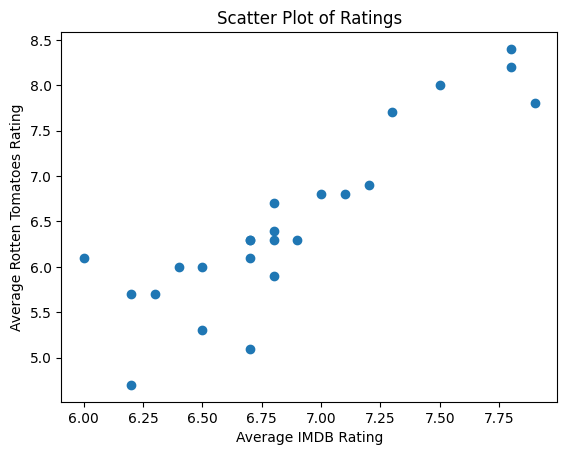

In [21]:
# regression analysis

fig, ax = plt.subplots()

ax.scatter(data['imdb'], data['rotten_tomatoes'])
ax.set_title('Scatter Plot of Ratings')
ax.set_xlabel('Average IMDB Rating')
ax.set_ylabel('Average Rotten Tomatoes Rating')
fig.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [31]:
x = data.loc[:, ['imdb']]

y = data.loc[:, 'rotten_tomatoes']

In [32]:
model = LinearRegression()
model.fit(x,y)

r_squared = f"R-Squared: {model.score(x,y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x {model.intercept_:+.4f}"

y_pred = model.predict(x)

C:\Users\ivane\AppData\Local\Temp\ipykernel_12856\764399161.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


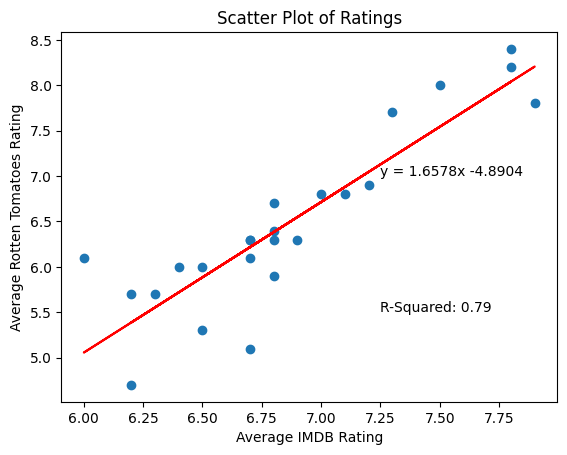

In [33]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x, y_pred, color = 'red')
ax.text(7.25, 5.5, r_squared, fontsize=10)
ax.text(7.25, 7, best_fit, fontsize=10)
ax.set_title('Scatter Plot of Ratings')
ax.set_xlabel('Average IMDB Rating')
ax.set_ylabel('Average Rotten Tomatoes Rating')
fig.show()

C:\Users\ivane\AppData\Local\Temp\ipykernel_12856\661174803.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


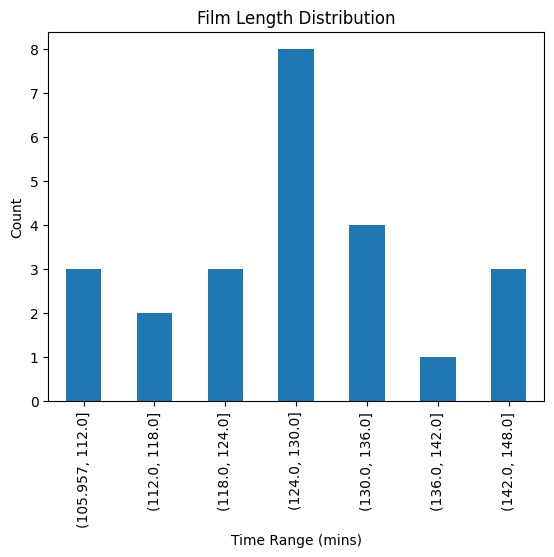

In [35]:
# Statistical Distribution

fig, ax = plt.subplots()

length = data['film_length'].value_counts(bins=7).sort_index()
length.plot.bar(
    ax=ax,
    title= 'Film Length Distribution',
    xlabel = 'Time Range (mins)',
    ylabel = 'Count'
)
fig.show()